In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('/Users/ilya/Desktop/GitHub_Repositories/DataSets/properties_data.csv')

In [3]:
data.shape

(1905, 38)

In [4]:
data.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [5]:
data.isnull().sum()

id                     0
neighborhood           0
latitude               0
longitude              0
price                  0
size_in_sqft           0
price_per_sqft         0
no_of_bedrooms         0
no_of_bathrooms        0
quality                0
maid_room              0
unfurnished            0
balcony                0
barbecue_area          0
built_in_wardrobes     0
central_ac             0
childrens_play_area    0
childrens_pool         0
concierge              0
covered_parking        0
kitchen_appliances     0
lobby_in_building      0
maid_service           0
networked              0
pets_allowed           0
private_garden         0
private_gym            0
private_jacuzzi        0
private_pool           0
security               0
shared_gym             0
shared_pool            0
shared_spa             0
study                  0
vastu_compliant        0
view_of_landmark       0
view_of_water          0
walk_in_closet         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  maid_room            1905 non-null   bool   
 11  unfurnished          1905 non-null   bool   
 12  balcony              1905 non-null   bool   
 13  barbecue_area        1905 non-null   bool   
 14  built_in_wardrobes   1905 non-null   bool   
 15  central_ac           1905 non-null   b

In [7]:
categorical_columns = list(data.select_dtypes(include=['object', 'bool']).columns)

numerical_columns = list(data.select_dtypes(exclude='object').columns)

In [8]:
len(categorical_columns)

30

In [30]:
def get_redundant_pairs(data):
    pairs_to_drop = set()
    cols = data.columns
    for i in range(0, data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(filter_data, n=5):
    au_corr = filter_data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(filter_data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data[numerical_columns], 15))

Top Absolute Correlations
no_of_bedrooms     no_of_bathrooms      0.854384
childrens_pool     lobby_in_building    0.817088
price              size_in_sqft         0.808595
networked          vastu_compliant      0.783794
size_in_sqft       no_of_bedrooms       0.775113
                   no_of_bathrooms      0.725397
lobby_in_building  networked            0.712753
childrens_pool     networked            0.712651
price              price_per_sqft       0.705538
shared_gym         shared_pool          0.704557
childrens_pool     vastu_compliant      0.679356
maid_service       vastu_compliant      0.634285
networked          shared_spa           0.633528
maid_service       networked            0.611942
lobby_in_building  vastu_compliant      0.608206
dtype: float64


In [31]:
def drop_highly_correlated(data, threshold=0.7):
    cols_to_remove = []
    corr_data = get_top_abs_correlations(data)
    for pair, corr in corr_data.items():
        if corr > threshold:
            cols_to_remove.append(pair[1])  # добавляем вторую колонку из пары

    data = data.drop(columns=set(cols_to_remove))  # удаляем дубликаты из списка
    return data

data = drop_highly_correlated(data)

ValueError: could not convert string to float: 'Palm Jumeirah'

In [28]:
data.shape

(1905, 38)

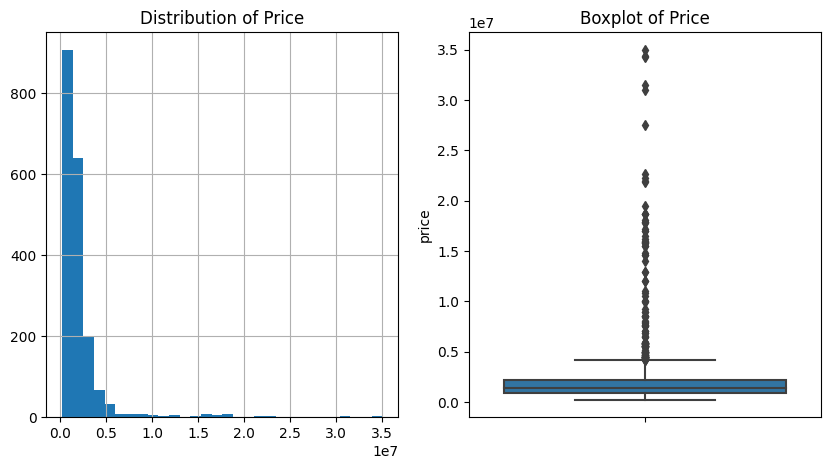

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
data['price'].hist(bins=30)
plt.title('Distribution of Price')

plt.subplot(1,2,2)
sns.boxplot(y=data['price'])
plt.title('Boxplot of Price')
plt.show()

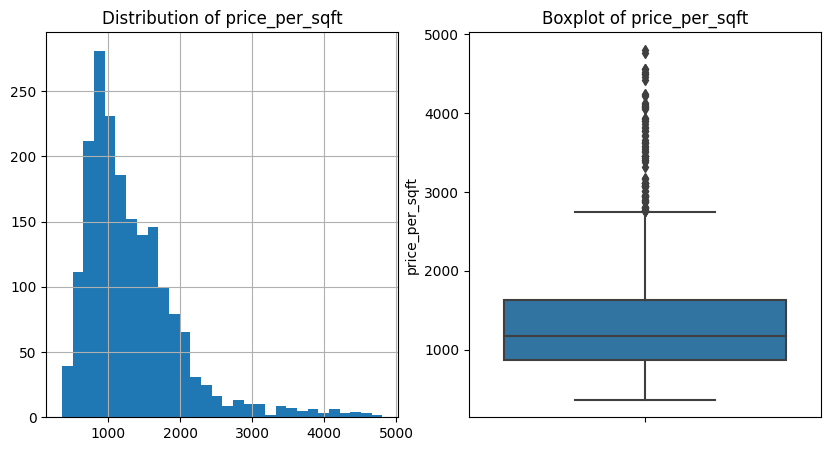

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
data['price_per_sqft'].hist(bins=30)
plt.title('Distribution of price_per_sqft')

plt.subplot(1,2,2)
sns.boxplot(y=data['price_per_sqft'])
plt.title('Boxplot of price_per_sqft')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

# Splitting the data into features (X) and target (y)
X_price = data.drop(['price', 'price_per_sqft'], axis=1)
y_price = data['price']

# Identifying categorical features
cat_features = X_price.select_dtypes(include=['object', 'bool']).columns.tolist()

# Splitting the data into train and test sets
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.2, random_state=42)

# Initialize CatBoostRegressor with 8 cores
model_price = CatBoostRegressor(iterations=5000, loss_function='RMSE', random_seed=42)

# Fit model
model_price.fit(X_train_price, y_train_price, cat_features=cat_features, eval_set=(X_test_price, y_test_price))

# Get predictions
preds_price = model_price.predict(X_test_price)

Learning rate set to 0.020382
0:	learn: 2896574.5903951	test: 2828555.8713120	best: 2828555.8713120 (0)	total: 57.8ms	remaining: 4m 49s
1:	learn: 2866823.8733595	test: 2801585.5260328	best: 2801585.5260328 (1)	total: 59.9ms	remaining: 2m 29s
2:	learn: 2838448.3032981	test: 2775997.9187238	best: 2775997.9187238 (2)	total: 61.5ms	remaining: 1m 42s
3:	learn: 2806474.3303782	test: 2751873.5901638	best: 2751873.5901638 (3)	total: 63.3ms	remaining: 1m 19s
4:	learn: 2775001.1605076	test: 2727363.1540080	best: 2727363.1540080 (4)	total: 65ms	remaining: 1m 4s
5:	learn: 2747918.4453972	test: 2704182.6564663	best: 2704182.6564663 (5)	total: 66.4ms	remaining: 55.2s
6:	learn: 2719274.2629102	test: 2679787.9060988	best: 2679787.9060988 (6)	total: 67.9ms	remaining: 48.4s
7:	learn: 2684945.5528798	test: 2647491.8235317	best: 2647491.8235317 (7)	total: 69.5ms	remaining: 43.4s
8:	learn: 2655124.4028542	test: 2624212.2777905	best: 2624212.2777905 (8)	total: 71ms	remaining: 39.4s
9:	learn: 2627062.6533382

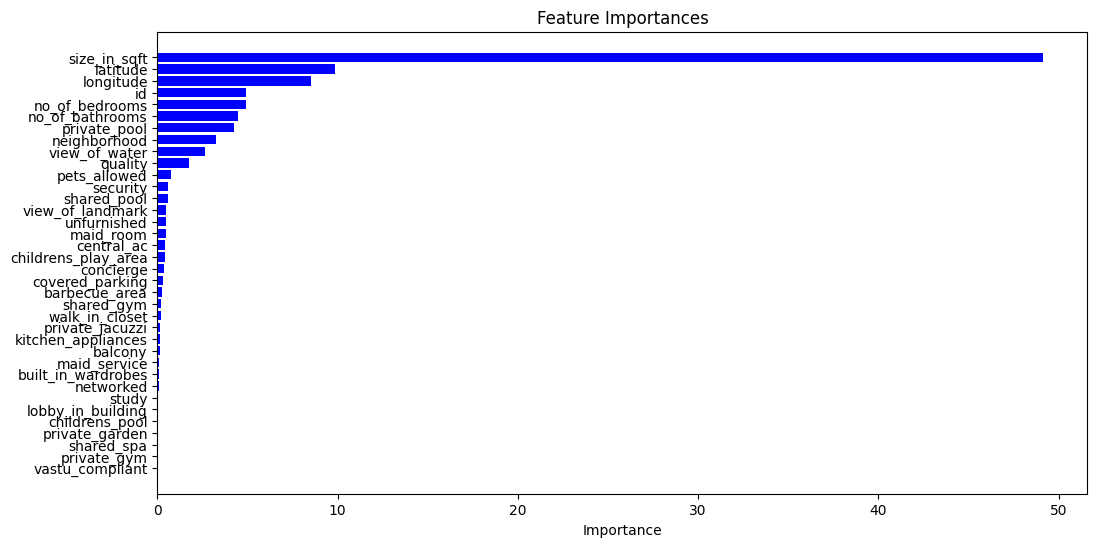

In [15]:
# Get feature importances
feature_importances = model_price.get_feature_importance()

# Create a pandas DataFrame for easier manipulation
feature_importances_data = pd.DataFrame(list(zip(X_price.columns, feature_importances)), columns=['Feature', 'Importance'])

# Sort values by importance
feature_importances_data = feature_importances_data.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(feature_importances_data['Feature'], feature_importances_data['Importance'], color='b', align='center')
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_price, preds_price)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_price, preds_price)
r2 = r2_score(y_test_price, preds_price)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")


MSE: 1512281257461.7566
RMSE: 1229748.4529210664
MAE: 428342.09028362914
R²: 0.813624099207753


In [20]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

# Splitting the data into features (X) and target (y)
X_price_per_sqft = data.drop(['price', 'price_per_sqft'], axis=1)
y_price_per_sqft = data['price_per_sqft']

# Identifying categorical features
cat_features = X_price_per_sqft.select_dtypes(include=['object', 'bool']).columns.tolist()

# Splitting the data into train and test sets
X_train_price_per_sqft, X_test_price_per_sqft, y_train_price_per_sqft, y_test_price_per_sqft = train_test_split(X_price_per_sqft, y_price_per_sqft, test_size=0.2, random_state=42)

# Initialize CatBoostRegressor with 8 cores
model_price_per_sqft = CatBoostRegressor(iterations=5000, loss_function='RMSE', random_seed=42)

# Fit model
model_price_per_sqft.fit(X_train_price_per_sqft, y_train_price_per_sqft, cat_features=cat_features, eval_set=(X_test_price_per_sqft, y_test_price_per_sqft))

# Get predictions
preds_price_per_sqft = model_price_per_sqft.predict(X_test_price_per_sqft)

Learning rate set to 0.020382
0:	learn: 679.7015410	test: 596.5592088	best: 596.5592088 (0)	total: 2.37ms	remaining: 11.9s
1:	learn: 675.3371251	test: 592.6793575	best: 592.6793575 (1)	total: 5.48ms	remaining: 13.7s
2:	learn: 670.0967380	test: 588.5089657	best: 588.5089657 (2)	total: 7.72ms	remaining: 12.9s
3:	learn: 664.8931684	test: 584.0260154	best: 584.0260154 (3)	total: 9.16ms	remaining: 11.4s
4:	learn: 660.4374297	test: 580.1858536	best: 580.1858536 (4)	total: 10.9ms	remaining: 10.9s
5:	learn: 656.2403403	test: 576.6936637	best: 576.6936637 (5)	total: 12.4ms	remaining: 10.4s
6:	learn: 651.5402707	test: 572.7861901	best: 572.7861901 (6)	total: 14ms	remaining: 10s
7:	learn: 647.5542613	test: 569.1505501	best: 569.1505501 (7)	total: 15.6ms	remaining: 9.72s
8:	learn: 643.0800976	test: 565.7786293	best: 565.7786293 (8)	total: 17.2ms	remaining: 9.54s
9:	learn: 639.3675556	test: 562.6287106	best: 562.6287106 (9)	total: 19ms	remaining: 9.46s
10:	learn: 635.9379740	test: 559.4163343	best:

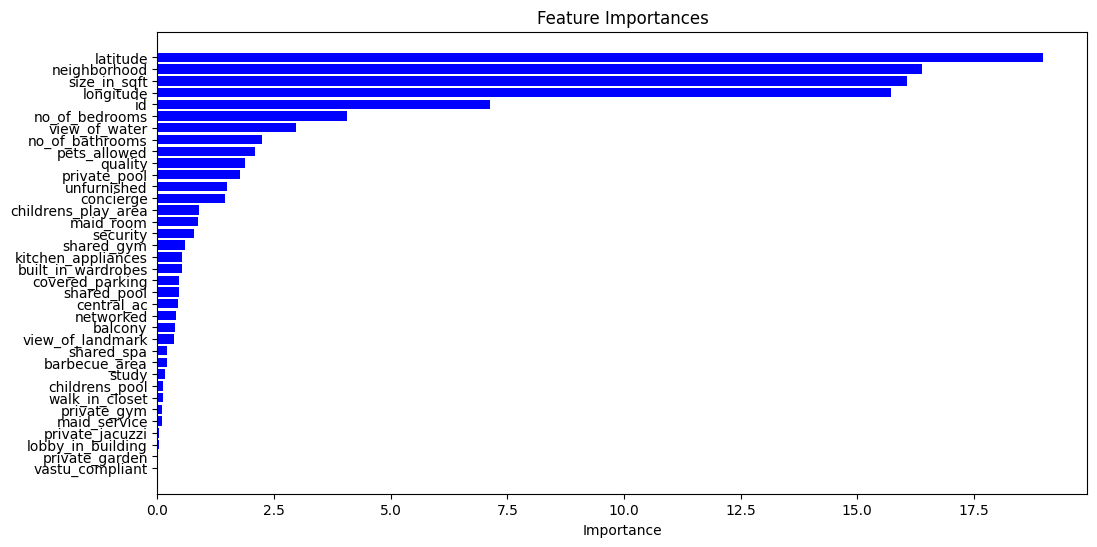

In [21]:
# Get feature importances
feature_importances = model_price_per_sqft.get_feature_importance()

# Create a pandas DataFrame for easier manipulation
feature_importances_data = pd.DataFrame(list(zip(X_price_per_sqft.columns, feature_importances)), columns=['Feature', 'Importance'])

# Sort values by importance
feature_importances_data = feature_importances_data.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(feature_importances_data['Feature'], feature_importances_data['Importance'], color='b', align='center')
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_price_per_sqft, preds_price_per_sqft)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_price_per_sqft, preds_price_per_sqft)
r2 = r2_score(y_test_price_per_sqft, preds_price_per_sqft)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")


MSE: 112280.76628268414
RMSE: 335.0832229203428
MAE: 226.55909288048338
R²: 0.6843581153430782
